In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import matthews_corrcoef

In [7]:
early_warning_url = "data_exp_2.csv"
early_warning = pd.read_csv(early_warning_url, sep=";")
early_warning

,Unnamed: 0,total_ips_origem,total_ips_destino,total_pacotes,5_kurt_total_ips_origem,5_skw_total_ips_destino,5_coefficient_variation_total_pacotes,has_bot
0,0,213,226,3802,NaN,NaN,NaN,0
1,1,203,223,3259,NaN,NaN,NaN,0
2,2,202,202,3966,NaN,NaN,NaN,0
3,3,196,208,3889,NaN,NaN,NaN,0
4,4,184,188,4077,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
967,967,188,192,3720,-0.657621,0.266671,0.264275,0
968,968,183,183,3567,-0.744471,0.215100,0.126705,0
969,969,209,210,3515,-0.743502,0.248631,0.124742,0
970,970,211,224,3884,-0.737227,0.212200,0.124317,0


In [8]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation

class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)
        
def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

In [9]:
idioma = 'en'
labels_traducao = []
if idioma == 'en':
    labels_traducao = ['\n\nKurtosis of total \nsource IPs',
                      '\n\nCV of number packets',
                       '\n\nSkewness of total \ndestination IPs',
                       'Group 1',
                       'Group 2',
                       'Normal interval',
                       'Malicious interval',
                       '\n\nTotal source IPs',
                        '\n\nNumber packets',
                        '\n\nTotal destination IPs',
                      ]

In [10]:
colunas = ['5_kurt_total_ips_origem', '5_skw_total_ips_destino', '5_coefficient_variation_total_pacotes' ]
limit = 542
init = 47
x_train = early_warning[colunas].copy()[init:limit]
y_real = early_warning['has_bot'][init:limit]
clustering = KMeans(n_clusters=2, random_state=0).fit(x_train)    
y_test = clustering.labels_
cm = confusion_matrix(y_real, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
print(confusion_matrix(y_real, y_test))
print(classification_report(y_real, y_test, digits=4))

[[447  38]
 [  0  10]]
              precision    recall  f1-score   support

           0     1.0000    0.9216    0.9592       485
           1     0.2083    1.0000    0.3448        10

    accuracy                         0.9232       495
   macro avg     0.6042    0.9608    0.6520       495
weighted avg     0.9840    0.9232    0.9468       495



/home/anderson/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Figure size 432x288 with 0 Axes>

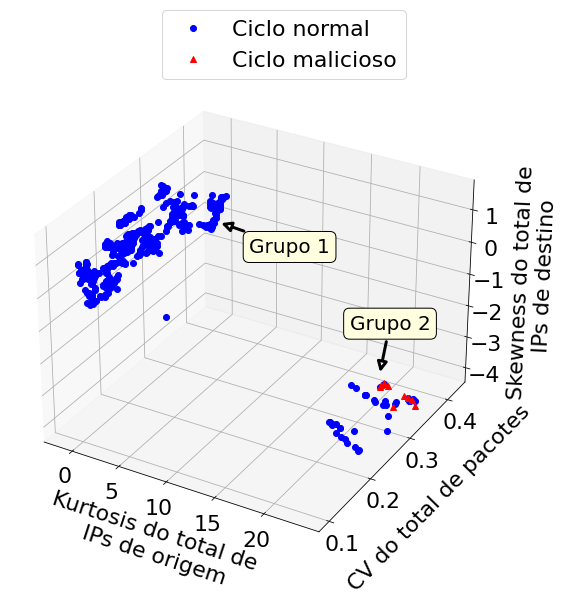

<Figure size 432x288 with 0 Axes>

In [11]:
colunas = ['5_kurt_total_ips_origem', '5_skw_total_ips_destino', '5_coefficient_variation_total_pacotes',
           'has_bot']
          
dataframe = early_warning[colunas][init:limit]
dataframe['y_test'] = y_test
df1= dataframe.query('has_bot == 0')                                
df2= dataframe.query('has_bot == 1')  

plt.clf()

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")
font_size = 22
ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]

font_size_group = 20
ax2.annotate3D('Grupo 1', (10, 0.2, 2),
              xytext=(30, -30),
              fontsize = font_size_group,               
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.annotate3D('Grupo 2', (30, 0.1, 0.4),
              xytext=(-30, 45),
              fontsize = font_size_group,               
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.set_xlabel('\n\nKurtosis do total de \n IPs de origem', fontsize=font_size) 
ax2.set_ylabel( '\n\nCV do total de pacotes', fontsize=font_size) 
ax2.set_zlabel('\n\nSkewness do total de \n IPs de destino', fontsize=font_size)

font_size_group = 20

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')
fig2.legend(loc="upper center",prop={'size': font_size})
plt.savefig("original.pdf")
plt.show()
plt.clf()

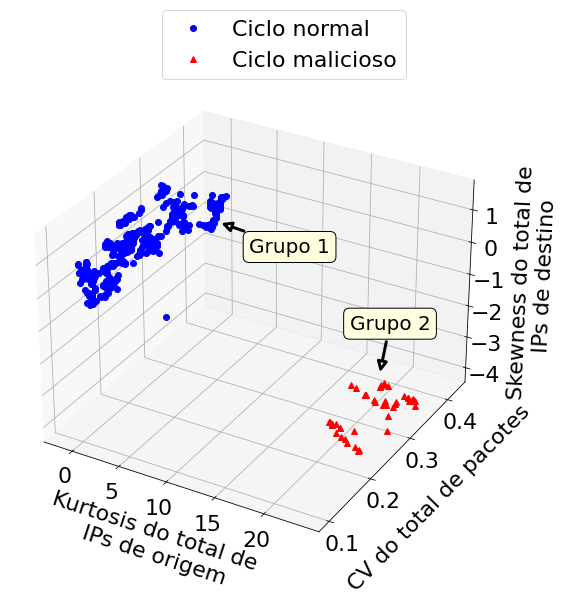

In [12]:
df1= dataframe.query('y_test == 0')                                
df2= dataframe.query('y_test == 1')  

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")

ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]

ax2.set_xlabel('\n\nKurtosis do total de \n IPs de origem', fontsize=font_size) 
ax2.set_ylabel( '\n\nCV do total de pacotes', fontsize=font_size) 
ax2.set_zlabel('\n\nSkewness do total de \n IPs de destino', fontsize=font_size)

font_size_group = 20
ax2.annotate3D('Grupo 1', (10, 0.2, 2),
              xytext=(30, -30),
              fontsize = font_size_group,               
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.annotate3D('Grupo 2', (30, 0.1, 0.4),
              xytext=(-30, 45),
              fontsize = font_size_group,               
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=3))

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')

fig2.legend(loc="upper center",prop={'size': font_size})
plt.savefig("cluster.pdf")
plt.show()

<Figure size 432x288 with 0 Axes>

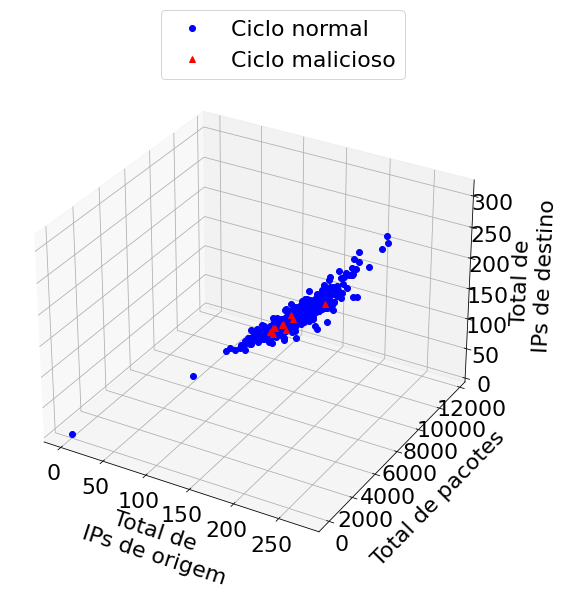

<Figure size 432x288 with 0 Axes>

In [13]:
colunas = ['total_ips_origem', 'total_ips_destino', 'total_pacotes',
           'has_bot']
          
dataframe = early_warning[colunas][init:limit]
dataframe['y_test'] = y_test
df1= dataframe.query('has_bot == 0')                                
df2= dataframe.query('has_bot == 1')  

plt.clf()

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")
font_size = 22
ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]


ax2.set_xlabel('\n\nTotal de \n IPs de origem', fontsize=font_size) 
ax2.set_ylabel( '\n\nTotal de pacotes', fontsize=font_size) 
ax2.set_zlabel('\n\nTotal de \n IPs de destino', fontsize=font_size)

font_size_group = 20

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label="Ciclo normal", c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label="Ciclo malicioso", c='red')
fig2.legend(loc="upper center",prop={'size': font_size})
plt.savefig("sem_esap.pdf")
plt.show()
plt.clf()